In [65]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Homicídios Amazônia Legal - Período de 1980 até 2017 - Segurança Pública

In [2]:
df = pd.read_excel('ipeadata_Homicidios_Amazonia_Legal.xls')

In [3]:
df.head()

,Sigla,Codigo,Município,1980,1981,1982,1983,1984,1985,1986,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AC,1200013,Acrelândia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,5.0,2.0,1.0,4.0,4.0,3.0,7.0,5.0
1,AC,1200054,Assis Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,2.0,1.0,2.0,NaN,1.0,2.0,4.0
2,AC,1200104,Brasiléia,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,3.0,6.0,6.0,7.0,4.0,7.0,7.0,3.0,8.0,9.0
3,AC,1200138,Bujari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,5.0,5.0,2.0
4,AC,1200179,Capixaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,1.0,3.0,2.0,1.0,4.0,3.0,5.0


In [4]:
df.tail()

,Sigla,Codigo,Município,1980,1981,1982,1983,1984,1985,1986,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
767,TO,1721208,Tocantinópolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,6.0,8.0,5.0,1.0,4.0,8.0,7.0,7.0
768,TO,1721257,Tupirama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0
769,TO,1721307,Tupiratins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN
770,TO,1722081,Wanderlândia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,6.0,3.0,6.0,3.0,3.0,4.0,2.0,9.0,6.0
771,TO,1722107,Xambioá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,NaN,1.0,4.0,1.0,2.0,5.0,6.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 41 columns):
Sigla        772 non-null object
Codigo       772 non-null int64
Município    772 non-null object
1980         89 non-null float64
1981         99 non-null float64
1982         111 non-null float64
1983         161 non-null float64
1984         180 non-null float64
1985         178 non-null float64
1986         193 non-null float64
1987         195 non-null float64
1988         223 non-null float64
1989         255 non-null float64
1990         237 non-null float64
1991         270 non-null float64
1992         269 non-null float64
1993         287 non-null float64
1994         292 non-null float64
1995         300 non-null float64
1996         311 non-null float64
1997         347 non-null float64
1998         354 non-null float64
1999         372 non-null float64
2000         381 non-null float64
2001         407 non-null float64
2002         440 non-null float64
2003         505 

In [6]:
df.columns

Index(['Sigla', 'Codigo', 'Município', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [7]:
df.rename(columns={'Sigla': 'UF'}, inplace=True)

In [8]:
df.head()

,UF,Codigo,Município,1980,1981,1982,1983,1984,1985,1986,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AC,1200013,Acrelândia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,5.0,2.0,1.0,4.0,4.0,3.0,7.0,5.0
1,AC,1200054,Assis Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,2.0,1.0,2.0,NaN,1.0,2.0,4.0
2,AC,1200104,Brasiléia,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,3.0,6.0,6.0,7.0,4.0,7.0,7.0,3.0,8.0,9.0
3,AC,1200138,Bujari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,5.0,5.0,2.0
4,AC,1200179,Capixaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,1.0,3.0,2.0,1.0,4.0,3.0,5.0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Codigo,772.0,2.288422e+06,1.365992e+06,1100015.0,1502797.5,1713254.5,2109278.50,5108956.0
1980,89.0,8.370787e+00,2.112430e+01,1.0,1.0,2.0,5.00,140.0
1981,99.0,8.828283e+00,2.163380e+01,1.0,1.0,2.0,6.00,156.0
1982,111.0,8.414414e+00,1.919823e+01,1.0,1.0,3.0,6.00,139.0
1983,161.0,6.962733e+00,1.782866e+01,1.0,1.0,3.0,5.00,176.0
1984,180.0,7.661111e+00,1.955115e+01,1.0,1.0,2.0,6.00,170.0
1985,178.0,8.573034e+00,1.964135e+01,1.0,1.0,3.0,7.00,161.0
1986,193.0,9.435233e+00,2.058790e+01,1.0,1.0,3.0,7.00,183.0
1987,195.0,9.938462e+00,2.261001e+01,1.0,1.0,3.0,6.50,173.0
1988,223.0,9.434978e+00,2.387531e+01,1.0,1.0,3.0,6.00,206.0


## Total de Homícidios por Municipios - 2013 até 2017

In [58]:
Mun_AnoGroup = df.groupby("Município")["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"].sum().reset_index()

In [54]:
Mun_AnoGroup.sort_values(by= "2017", ascending=False).head(50)

,Município,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
373,Manaus,556.0,648.0,748.0,847.0,1026.0,1034.0,869.0,916.0,1130.0,1002.0,1187.0
95,Belém,505.0,735.0,700.0,895.0,682.0,780.0,840.0,826.0,875.0,1101.0,1072.0
677,São Luís,322.0,356.0,436.0,458.0,478.0,554.0,774.0,856.0,758.0,601.0,506.0
39,Ananindeua,182.0,289.0,295.0,486.0,363.0,344.0,368.0,304.0,352.0,427.0,451.0
569,Rio Branco,96.0,78.0,97.0,101.0,78.0,101.0,134.0,152.0,126.0,236.0,324.0
368,Macapá,119.0,143.0,115.0,181.0,127.0,156.0,143.0,182.0,188.0,261.0,257.0
376,Marabá,177.0,247.0,271.0,240.0,239.0,220.0,187.0,170.0,201.0,205.0,239.0
538,Porto Velho,173.0,145.0,160.0,203.0,167.0,184.0,183.0,178.0,208.0,225.0,184.0
217,Cuiabá,214.0,217.0,232.0,218.0,248.0,242.0,224.0,269.0,256.0,217.0,162.0
174,Castanhal,64.0,87.0,102.0,105.0,143.0,104.0,96.0,101.0,124.0,147.0,151.0


In [21]:
df_homicidios = Mun_AnoGroup.sort_values(by= "2017", ascending=False).head(50)

In [22]:
df_homicidios['Total'] = (df_homicidios['2007'] + df_homicidios['2008'] + df_homicidios['2009']+ df_homicidios['2010']+ df_homicidios['2011']+ df_homicidios['2012']+ df_homicidios['2013'] + df_homicidios['2014'] + df_homicidios['2015']+ df_homicidios['2016']+ df_homicidios['2017'])

In [25]:
df_homicidios.head(12)

,Município,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
373,Manaus,556.0,648.0,748.0,847.0,1026.0,1034.0,869.0,916.0,1130.0,1002.0,1187.0,9963.0
95,Belém,505.0,735.0,700.0,895.0,682.0,780.0,840.0,826.0,875.0,1101.0,1072.0,9011.0
677,São Luís,322.0,356.0,436.0,458.0,478.0,554.0,774.0,856.0,758.0,601.0,506.0,6099.0
39,Ananindeua,182.0,289.0,295.0,486.0,363.0,344.0,368.0,304.0,352.0,427.0,451.0,3861.0
569,Rio Branco,96.0,78.0,97.0,101.0,78.0,101.0,134.0,152.0,126.0,236.0,324.0,1523.0
368,Macapá,119.0,143.0,115.0,181.0,127.0,156.0,143.0,182.0,188.0,261.0,257.0,1872.0
376,Marabá,177.0,247.0,271.0,240.0,239.0,220.0,187.0,170.0,201.0,205.0,239.0,2396.0
538,Porto Velho,173.0,145.0,160.0,203.0,167.0,184.0,183.0,178.0,208.0,225.0,184.0,2010.0
217,Cuiabá,214.0,217.0,232.0,218.0,248.0,242.0,224.0,269.0,256.0,217.0,162.0,2499.0
174,Castanhal,64.0,87.0,102.0,105.0,143.0,104.0,96.0,101.0,124.0,147.0,151.0,1224.0


## Top 20 - Municípios com maiores qntd de homícidios entre 2007 e 2017 - Amazônia Legal

In [52]:
top_20 = df_homicidios.sort_values(by=['Total','Município'], ascending=False).head(20)

In [35]:
top_20

,Município,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
373,Manaus,556.0,648.0,748.0,847.0,1026.0,1034.0,869.0,916.0,1130.0,1002.0,1187.0,9963.0
95,Belém,505.0,735.0,700.0,895.0,682.0,780.0,840.0,826.0,875.0,1101.0,1072.0,9011.0
677,São Luís,322.0,356.0,436.0,458.0,478.0,554.0,774.0,856.0,758.0,601.0,506.0,6099.0
39,Ananindeua,182.0,289.0,295.0,486.0,363.0,344.0,368.0,304.0,352.0,427.0,451.0,3861.0
217,Cuiabá,214.0,217.0,232.0,218.0,248.0,242.0,224.0,269.0,256.0,217.0,162.0,2499.0
376,Marabá,177.0,247.0,271.0,240.0,239.0,220.0,187.0,170.0,201.0,205.0,239.0,2396.0
538,Porto Velho,173.0,145.0,160.0,203.0,167.0,184.0,183.0,178.0,208.0,225.0,184.0,2010.0
368,Macapá,119.0,143.0,115.0,181.0,127.0,156.0,143.0,182.0,188.0,261.0,257.0,1872.0
569,Rio Branco,96.0,78.0,97.0,101.0,78.0,101.0,134.0,152.0,126.0,236.0,324.0,1523.0
297,Imperatriz,148.0,134.0,105.0,107.0,104.0,135.0,129.0,169.0,138.0,181.0,123.0,1473.0


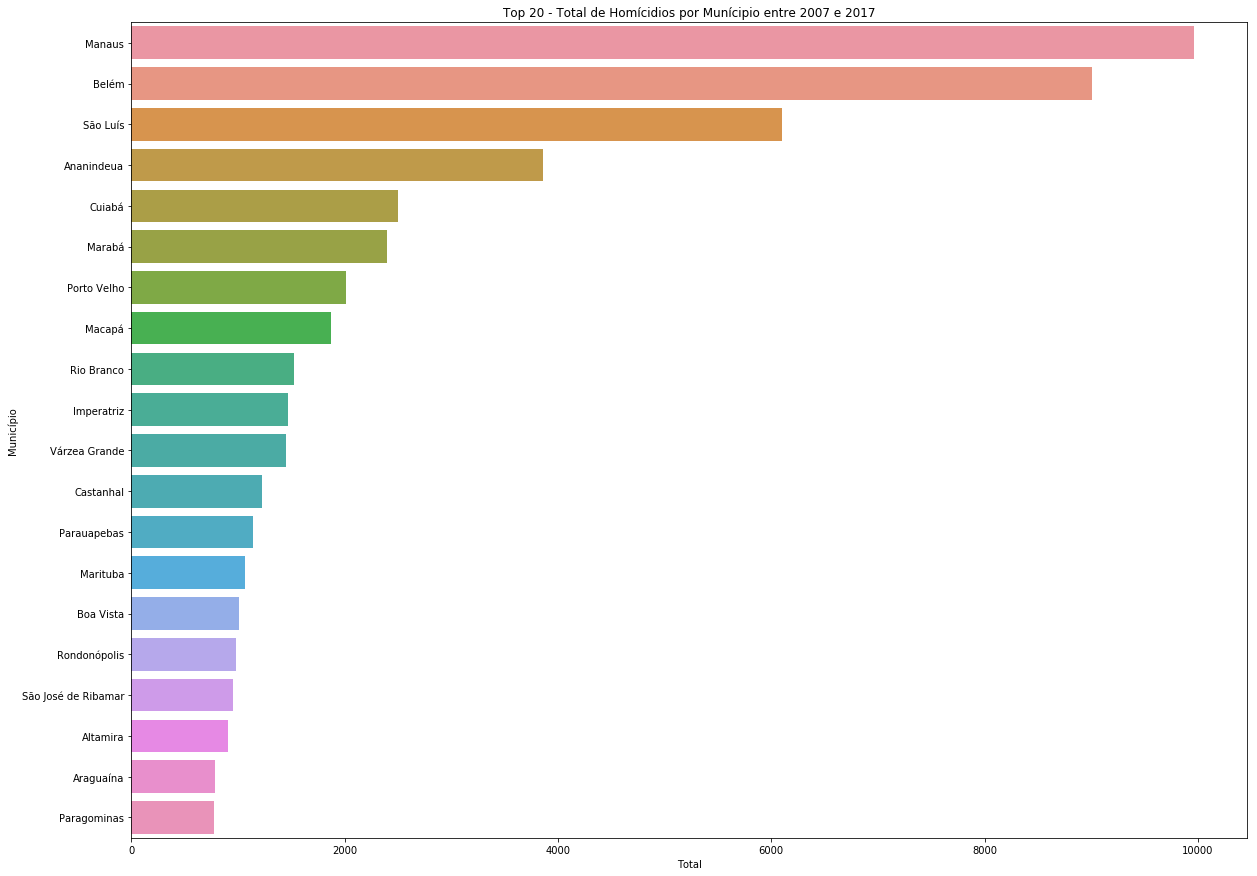

In [36]:
plt.figure(figsize=(20,15))
plt.title("Top 20 - Total de Homícidios por Munícipio entre 2007 e 2017")
sns.barplot(x="Total", y="Município", data=top_20);

## Evolução de Homicídios no Munícipio de Altamira - 2007 e 2017 

1) Este Município esta entre os mais violentos do país(segundo o Altas da Violencia - fonte: https://www.metropoles.com/brasil/policia-br/atlas-da-violencia-veja-as-cidades-mais-e-menos-violentas-no-pais).

2) Altamira é a cidade que mais desmata no país(fonte: Inpe - reportagem - https://www.metropoles.com/brasil/meio-ambiente-brasil/altamira-pa-e-a-cidade-que-mais-sofre-desmate-na-amazonia-diz-inpe).



In [66]:
Altamira = top_20[top_20.Município == 'Altamira']
Altamira

,Município,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
15,Altamira,44.0,42.0,47.0,64.0,75.0,78.0,92.0,103.0,114.0,98.0,149.0,906.0


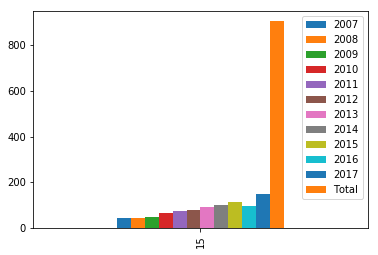

In [68]:
Altamira.plot.bar()

## Ranking de UF´s quem contêm mais municípios com os maiores índices de homícidios entre 2007 e 2017 - Amazônia Legal 

In [39]:
Ranking = df['UF'].value_counts()

In [40]:
Ranking

MA    181
PA    144
MT    141
TO    139
AM     62
RO     52
AC     22
AP     16
RR     15
Name: UF, dtype: int64

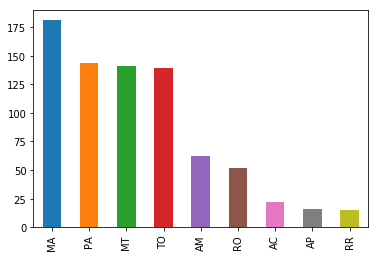

In [41]:
Ranking.plot.bar()

## Geolocalização - Amazônia Legal

In [42]:
# Dataset contendo localização (Latitude e Longitude) dos muninícipios brasileiros

df_location1 = pd.read_excel('Localizacao_Muni.xlsx')

In [43]:
df_location1.head()

,Municipio,Latitude,Longitude
0,18 de Julio,-33.684688,-53.558255
1,Abadia de Goiás,-16.762060,-49.438354
2,Abadia dos Dourados,-18.483287,-47.392467
3,Abadiânia,-16.197423,-48.706066
4,Abaeté,-19.152155,-45.455739


In [44]:
df_location1.rename(columns={'Municipio': 'Município'}, inplace=True)

In [45]:
df_location1.head()

,Município,Latitude,Longitude
0,18 de Julio,-33.684688,-53.558255
1,Abadia de Goiás,-16.762060,-49.438354
2,Abadia dos Dourados,-18.483287,-47.392467
3,Abadiânia,-16.197423,-48.706066
4,Abaeté,-19.152155,-45.455739


In [46]:
df_Homicide_location = top_16.merge(df_location1, on=['Município'], how='left')

In [47]:
df_Homicide_location

,Município,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total,Latitude,Longitude
0,Manaus,556.0,648.0,748.0,847.0,1026.0,1034.0,869.0,916.0,1130.0,1002.0,1187.0,9963.0,-3.119430e+00,-6.002211e+01
1,Belém,505.0,735.0,700.0,895.0,682.0,780.0,840.0,826.0,875.0,1101.0,1072.0,9011.0,-1.454980e+06,-4.850227e+07
2,São Luís,322.0,356.0,436.0,458.0,478.0,554.0,774.0,856.0,758.0,601.0,506.0,6099.0,-2.539515e+00,-4.428322e+01
3,Ananindeua,182.0,289.0,295.0,486.0,363.0,344.0,368.0,304.0,352.0,427.0,451.0,3861.0,-1.364293e+00,-4.837467e+01
4,Cuiabá,214.0,217.0,232.0,218.0,248.0,242.0,224.0,269.0,256.0,217.0,162.0,2499.0,-1.560185e+01,-5.609827e+01
5,Marabá,177.0,247.0,271.0,240.0,239.0,220.0,187.0,170.0,201.0,205.0,239.0,2396.0,-5.381150e+00,-4.913306e+01
6,Porto Velho,173.0,145.0,160.0,203.0,167.0,184.0,183.0,178.0,208.0,225.0,184.0,2010.0,-8.761573e+00,-6.390082e+01
7,Macapá,119.0,143.0,115.0,181.0,127.0,156.0,143.0,182.0,188.0,261.0,257.0,1872.0,3.419280e-02,-5.107018e+01
8,Rio Branco,96.0,78.0,97.0,101.0,78.0,101.0,134.0,152.0,126.0,236.0,324.0,1523.0,-9.973870e+06,-6.780754e+07
9,Imperatriz,148.0,134.0,105.0,107.0,104.0,135.0,129.0,169.0,138.0,181.0,123.0,1473.0,-5.518873e+00,-4.747810e+01


In [61]:
! pip install folium

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [63]:
import folium

m = folium.Map(location=[-9.313569,-45.205370], titles="Mapbox Bright", zoom_start=8)
folium.Marker(location=[-3.119430,-60.022109], popup="Manaus", tooltip="9963 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-1.454980,-48.502270], popup="Belém", tooltip="9011 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-2.539515,-44.283216], popup="São Luís", tooltip="6099 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-1.364293,-48.374675], popup="Ananindeua", tooltip="3861 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-15.601846,-56.098269], popup="Cuiabá", tooltip="2499 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[0.034193,-51.070180], popup="Macapá", tooltip="1872 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-5.381150,-49.133055], popup="Marabá", tooltip="2396 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-8.761573,-63.900824], popup="Porto Velho", tooltip="2010 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-9.973870,-67.807540], popup="Rio Branco", tooltip="1523 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-5.518873,-47.478099], popup="Imperatriz", tooltip="1473 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-15.646249,-56.132654], popup="Várzea Grande", tooltip="1447 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-1.298349,-47.917116], popup="Castanhal", tooltip="1224 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-6.068215,-49.904121], popup="Paraupebas", tooltip="1141 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[2.819230,-60.670650], popup="Marituba", tooltip="1064 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[2.819230,-60.670650], popup="Boa Vista", tooltip="1013 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-2.553858,-44.058080], popup="São José de Ribamar", tooltip="952 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-3.126536,-52.418180], popup="Altamira", tooltip="906 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-7.192070,-48.207790], popup="Araguaína", tooltip="782 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-2.997450,-47.353450], popup="Paragominas", tooltip="773 total de homícidios entre 2007 e 2017").add_to(m)
folium.Marker(location=[-16.471340,-54.637089], popup="Rondonópolis", tooltip="982 total de homícidios entre 2007 e 2017").add_to(m)
m
